In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./DIABETES.csv", encoding = 'euc=kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


Y : 목표변수, 연속형, 당뇨 발병확률

AGE :연속형, 나이

GENDER : 연속형 남성 = 1, 여성 = 2

BMI : 연속형 bmi지수

BP : 연속형, 혈압

CHOLESTREROL : 연속형, 총 콜레스트롤
LDL, HDL, TCH, LTG, GLUCOSE 

In [12]:
df_raw['GENDER1'] = df_raw['GENDER'] - 1
df_raw.drop(['GENDER'],axis = 1, inplace = True)
df_raw.head()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER1
0,151,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,75,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,141,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,206,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,135,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


#### 2. 변수 간의 경향성 파악 : 그래프 분석

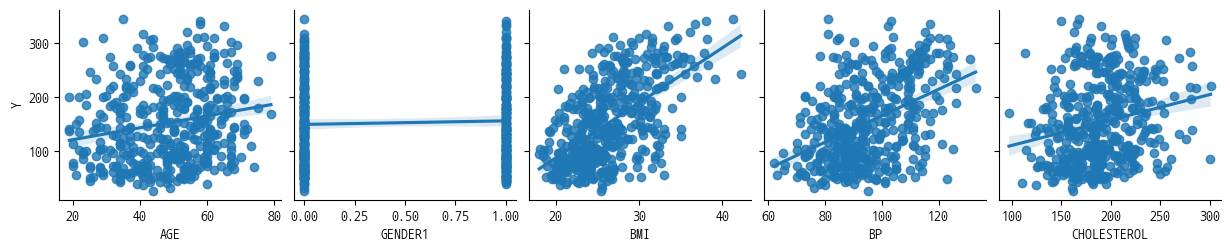

In [13]:
# 산점도 행렬 : 목표변수와 설명변수 지정
sns.pairplot(df_raw, y_vars = 'Y', x_vars = ['AGE','GENDER1','BMI','BP','CHOLESTEROL'], kind = 'reg')

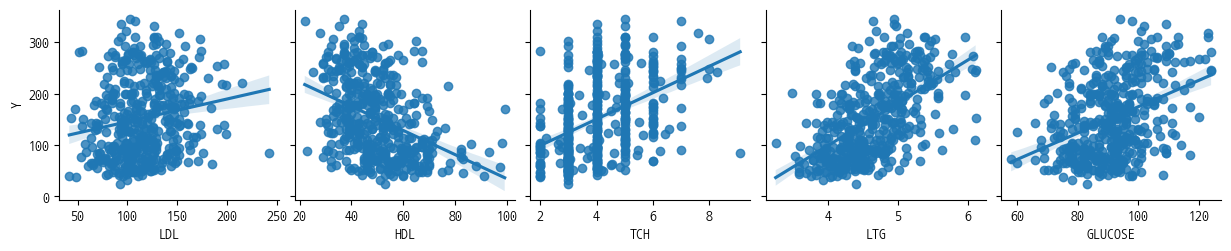

In [14]:
sns.pairplot(df_raw, y_vars = 'Y', x_vars = ['LDL','HDL','TCH','LTG','GLUCOSE'], kind = 'reg')

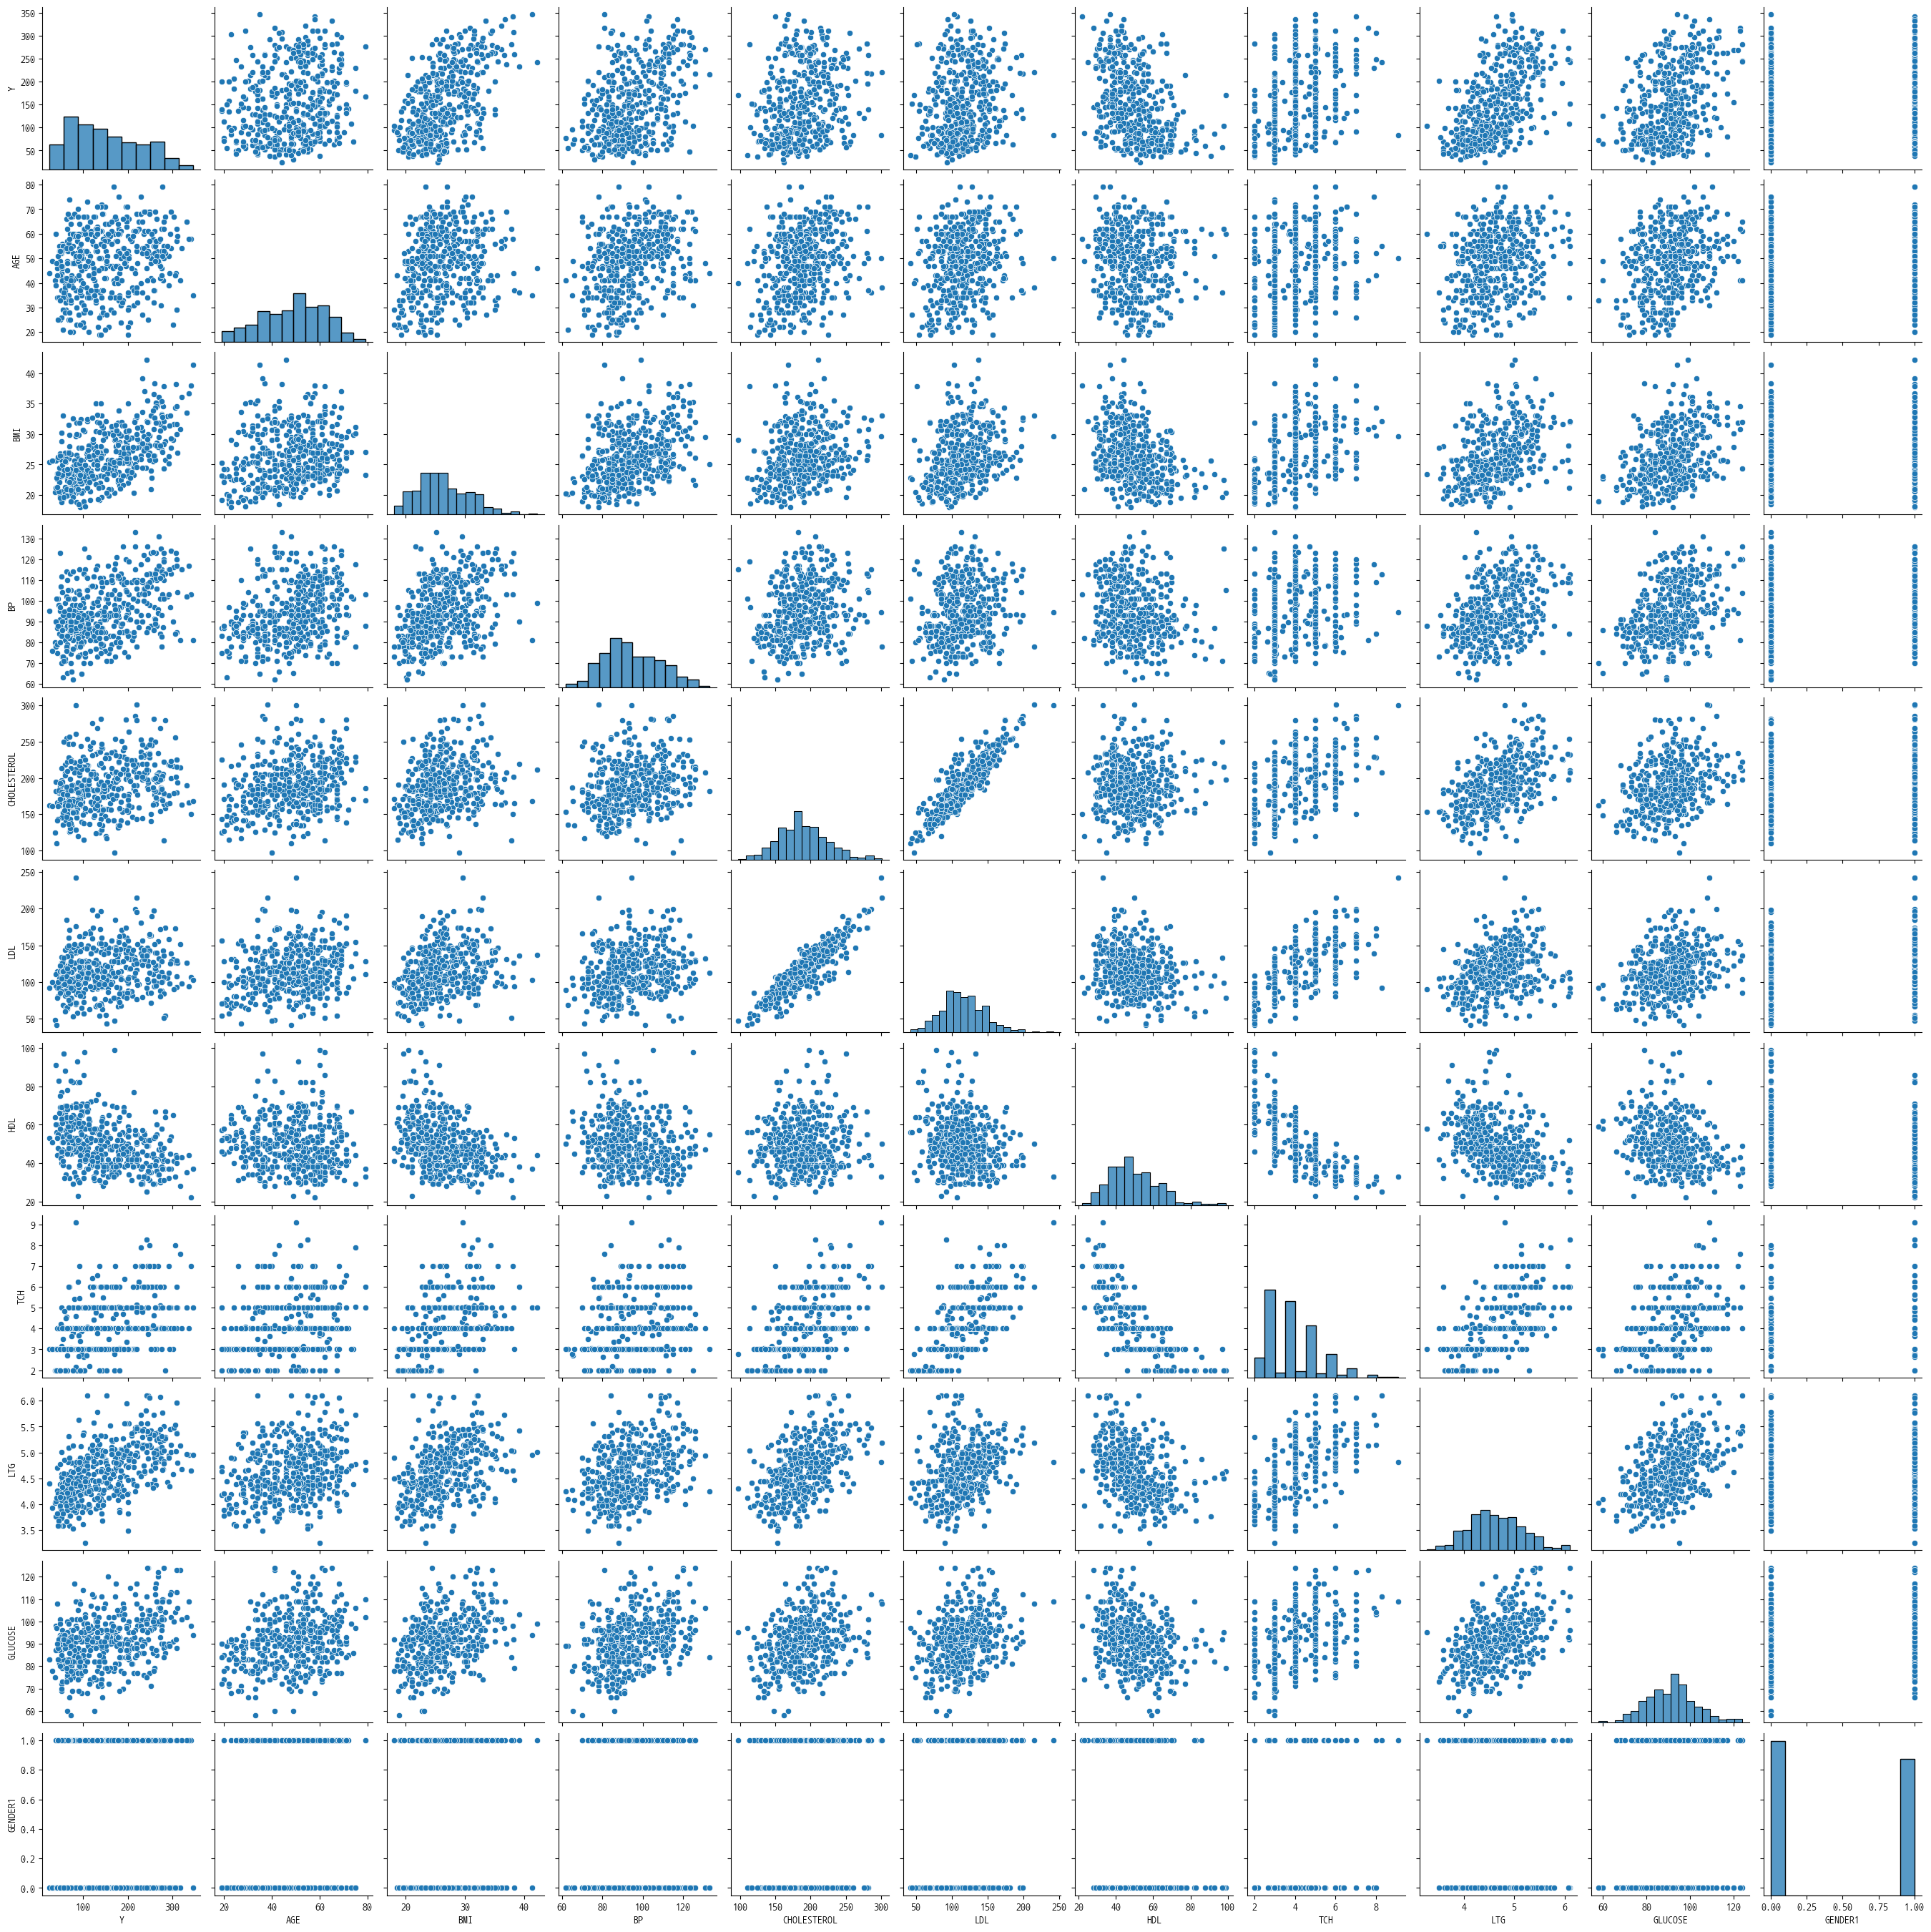

In [15]:
# 산점도 행렬
sns.pairplot(df_raw)

In [34]:
df_raw.corr().round(2)

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER1
Y,1.00,0.19,0.59,0.44,0.21,0.17,-0.39,0.43,0.57,0.38,0.04
AGE,0.19,1.00,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.17
BMI,0.59,0.19,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.09
BP,0.44,0.34,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.24
CHOLESTEROL,0.21,0.26,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.04
LDL,0.17,0.22,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.14
HDL,-0.39,-0.08,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.38
TCH,0.43,0.20,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.33
LTG,0.57,0.27,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.15
GLUCOSE,0.38,0.30,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.21


1. bmi 0.59

2. ltg 0.57

3. bp 0.44

순으로 y간의 높은 선형관계 확인

CHOLESTEROL과 LDL사이 상관관계가 0.9로 높다.

#### 3. 회귀모델 생성

모델의 적합성 검토 : 분석분선 확인 / 결정게수 확인

회귀계수 유의성 검토(표준화 회귀계수 포함)

다중공산성 검토

In [20]:
# train, test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (309, 11)
test data size: (133, 11)


In [23]:
#선형 회귀 분석 이용, 상소항 자동추기
reg_model = smf.ols(formula = "Y~AGE+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE+GENDER1", data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.24
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.68e-43
Time:                        13:26:43   Log-Likelihood:                -1668.9
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     298   BIC:                             3401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -361.7306     86.030     -4.205      

1. No. observations :309 / Df Residuals(잔차 자유도) :299 / Df Model(모델 자유도) : 10과

2. 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다

3. 설명력 : Adj. R-squred값이 0.511로 이 모델로 y의 51%정도 설명할 수 있다.

4. 회귀계수 검정 : BMI, BP, LTG, GENDER1의 p값이 유의수준보다 작으므로 유의하다

In [32]:
# 설명변수간의 다중공산성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('Y', axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
1,AGE,1.22
10,GENDER1,1.23
3,BP,1.46
2,BMI,1.49
9,GLUCOSE,1.52
7,TCH,8.76
8,LTG,10.49
6,HDL,16.56
5,LDL,38.83
4,CHOLESTEROL,60.66


VIF란, Variance Inflation Factor의 약자로서, 분산 팽창 인수라고 한다. 

이 값은 다중회귀분석에서 독립변수가 다중 공산성(Multicollnearity)의 문제를 갖고 있는지 판단하는 기준이며, 

주로 10보다 크면 그 독립변수는 다중공산성이 있다고 말한다

CHOLESTEROL이 60.66으로 매우 크므로 제거

In [36]:
# 선형 회귀 분석 : 모델에서 cholesterol제거
reg_model = smf.ols(formula = "Y~AGE+BMI+BP+LDL+HDL+TCH+LTG+GLUCOSE+GENDER1", data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     36.64
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.18e-43
Time:                        14:13:11   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     299   BIC:                             3397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -263.8177     45.399     -5.811      0.0

자유도, 결정계수, 회귀계수, 검정통계량, 유의확률 확인하기

In [37]:
# 설명변수간의 다중공산성 재확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop(['Y','CHOLESTEROL'], axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
1,AGE,1.22
9,GENDER1,1.23
3,BP,1.45
2,BMI,1.49
8,GLUCOSE,1.52
7,LTG,2.16
4,LDL,2.70
5,HDL,3.57
6,TCH,7.55
0,const,213.07


콜레스트롤을 제거하고 나니 모든 변수의 vif값이 전체적으로 줄어들었다

=> 다중공산성 해결

In [38]:
# 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 AGE제거
reg_model = smf.ols(formula = "Y~BMI+BP+LDL+HDL+TCH+LTG+GLUCOSE+GENDER1", data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     41.32
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.47e-44
Time:                        14:16:50   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3358.
Df Residuals:                     300   BIC:                             3391.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -262.7831     45.233     -5.810      0.0

In [39]:
# 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 TCH제거
reg_model = smf.ols(formula = "Y~BMI+BP+LDL+HDL+LTG+GLUCOSE+GENDER1", data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     47.34
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.25e-45
Time:                        14:17:35   Log-Likelihood:                -1669.9
No. Observations:                 309   AIC:                             3356.
Df Residuals:                     301   BIC:                             3386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.6717     44.520     -5.833      0.0

In [40]:
# 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 GLUCOSE제거
reg_model = smf.ols(formula = "Y~BMI+BP+LDL+HDL+LTG+GENDER1", data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     55.08
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.07e-45
Time:                        14:18:27   Log-Likelihood:                -1670.4
No. Observations:                 309   AIC:                             3355.
Df Residuals:                     302   BIC:                             3381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -245.5992     42.081     -5.836      0.0

In [53]:
# 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 LDL제거
reg_model = smf.ols(formula = "Y~BMI+BP+HDL+LTG+GENDER1", data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.13e-46
Time:                        15:15:47   Log-Likelihood:                -1671.4
No. Observations:                 309   AIC:                             3355.
Df Residuals:                     303   BIC:                             3377.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -249.0760     42.062     -5.922      0.0

p-value가 0.05보다 적은 변수들만 도출 

In [54]:
# 설명변수간의 다중공산성 재확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop(['Y','CHOLESTEROL','AGE','TCH','GLUCOSE','LDL'], axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
5,GENDER1,1.19
2,BP,1.31
3,HDL,1.42
1,BMI,1.43
4,LTG,1.45
0,const,183.47


남은 변수 :GENDER1, BP, HDL, BMI, LTG  

모든 변수의 vif가 10보다 작아졌다 => 다중공산성 해결

> 잔차의 가정 확인

- 등분산성 검정

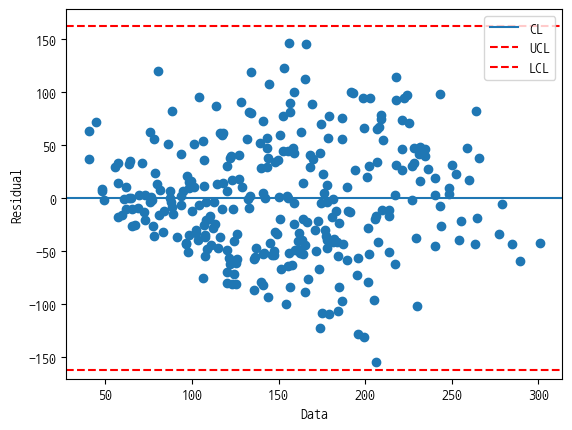

In [55]:
# 회귀 모델 잔차의 가정 확인

#잔차 산점도: X  - 예측값, Y - 잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--', color = 'red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='dashed', color = 'red', label='LCL')
plt.legend()
plt.show()

잔차가 0을 기준으로 random하게 산포되어 있으므로 등분산성을 만족한다.

- 정규성 검정

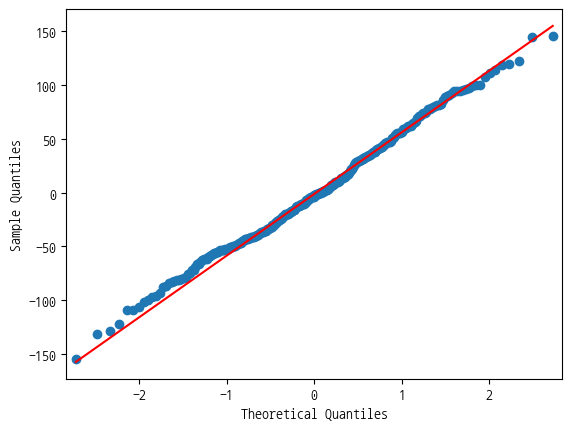

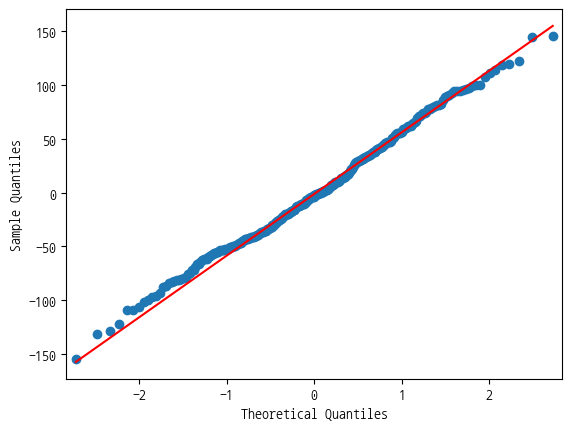

In [56]:
# 잔차 정규성 검정 qqplot, s-standardized line,
qqplot(reg_result.resid, line='q')

정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따른다. 

- 독립성 검정

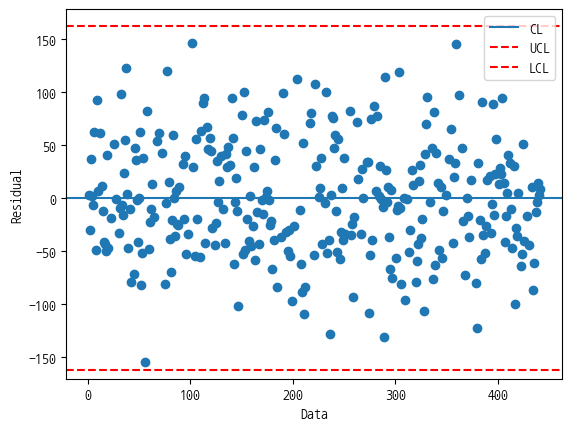

In [57]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label="CL")
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label="LCL")
plt.legend()

잔차가 0을 기준으로 관리상하한을 벗어나지 않고, random하게 산포되어 있으므로 독립성을 만족한다

> 모델의 성능 확인

In [58]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수: ",r2_score(df_train["Y"],train_pred))
print("test data의 결정계수: ",r2_score(df_test["Y"],test_pred))

train data의 결정계수:  0.5195783587017573
test data의 결정계수:  0.47623148143121874


train data의 결정계수는 75.1%

test data의 결정계수는 65.8%

> 모델의 성능

In [59]:
#RFE 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#목표변수, 설명변수 분리
df_train_y = df_train["Y"]
df_train_x = df_train.drop("Y",axis=1)

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개가 남을 때까지 선택
rfe = RFE(estimator= model, n_features_to_select=5).fit(df_train_x,df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("removed Variables : {}".format(removed_cols))

Selected Variables : Index(['BMI', 'BP', 'TCH', 'LTG', 'GENDER1'], dtype='object')
removed Variables : Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


> 후진제거법을 이용한 변수 선택 및 모델 생성

In [63]:
# 회귀 모델 생성
reg_model = smf.ols(formula='Y ~  BMI +BP + TCH + LTG + GENDER1', data=df_train)
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.75e-44
Time:                        15:25:10   Log-Likelihood:                -1676.7
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     303   BIC:                             3388.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -335.8794     33.343    -10.073      0.0

1. No. observations :309 / Df Residuals(잔차 자유도) :303 / Df Model(모델 자유도) : 5

2. 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 적합

3. 설명력 : Adj. R-squared = 0.494 이므로 이 모델을 통해서 y를 49%만큼 설명할 수 ㅇㅆ다.

4. 회귀계수 검정 : 절편을 제외하고, TCH는 p값이 0.05보다 크므로 유의하지 않음

BMI, BP, TCH, LTG, GENDER1 가 선택됨

이전 수작업으로 선택한 변수 : GENDER1, BP, HDL, BMI, LTG
 
 * 수작업으로 변수 선택한 내용과 다르다!

#### 4. 결론 도출

* 비표준화 회귀계수 기준, 수작업 모델링 결과 적용

<Axes: >

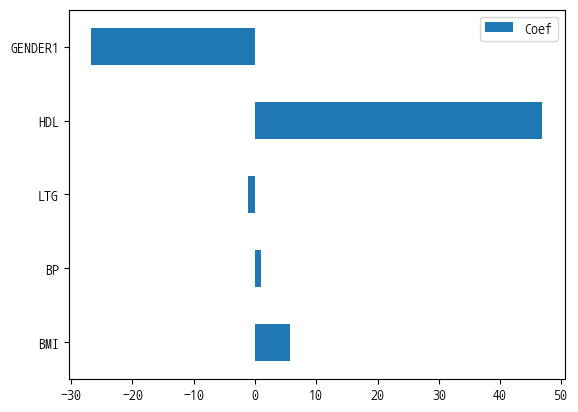

In [62]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ["BMI","BP","LTG",'HDL',"GENDER1"])
df_reg_coef.plot.barh(y = "Coef")

중요도는 회귀계수의 절대값 크기
gender가 1일수록, hdl이 높을수록 y값이 높음